# Support Vector Regression

# Importing libraries and datasets

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
dataset = pd.read_csv("/content/Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [25]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [26]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

# Feature Scaling

In [27]:
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [29]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [30]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# Training the model

In [31]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predict a new result

In [32]:
sc_y.inverse_transform(regressor.predict(sc_X.fit_transform([[6.5]])).reshape(-1,1))

array([[131106.77303274]])

In [39]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[2]])).reshape(-1,1))

array([[252760.40190944]])

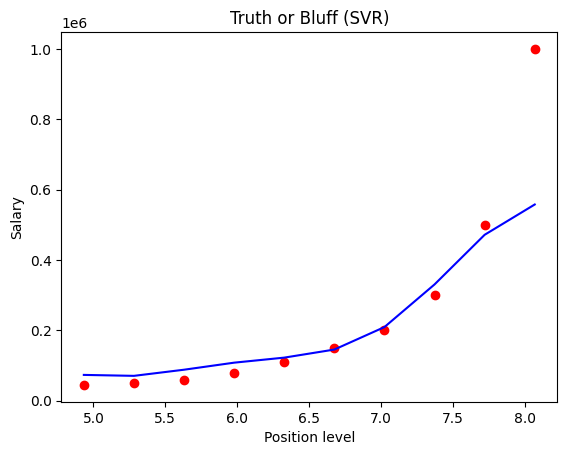

In [36]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()